In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

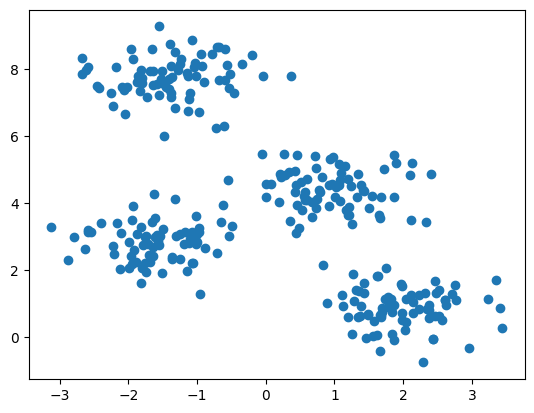

In [4]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

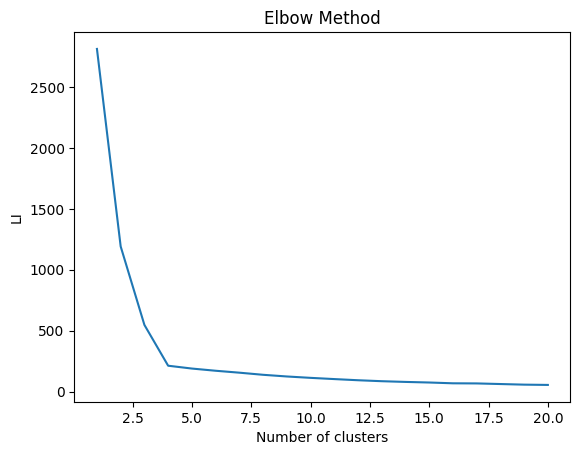

In [8]:
li = []
for i in range(1, 21):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  li.append(kmeans.inertia_)
plt.plot(range(1, 21), li)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('LI')
plt.show()

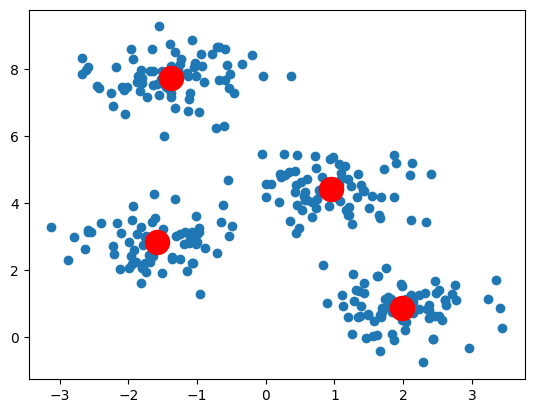

In [7]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

PCA


In [11]:
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)
X

array([[-1.39766210e-01, -2.66597563e+00,  4.75223523e+00,
         9.63444574e-01],
       [ 2.12098493e+00, -1.50302521e+00,  9.44230826e+00,
         3.97884972e+00],
       [-1.67751022e+00,  1.55231725e-01, -5.57209095e+00,
        -2.53502379e+00],
       [ 5.17725223e-01, -2.33653268e+00,  6.45511654e+00,
         1.94260436e+00],
       [-1.26629995e+00, -5.71950811e-01, -2.81865714e+00,
        -1.57259198e+00],
       [ 3.03069861e+00,  7.86181527e-01,  7.52832994e+00,
         4.01456114e+00],
       [ 8.50390478e-01,  1.99360966e+00, -1.50128479e+00,
         4.83079475e-01],
       [-1.40386703e+00, -6.54596452e-01, -2.78443581e+00,
        -1.91496256e+00],
       [-1.06516165e-01, -9.56970926e-03, -2.61943214e-01,
        -1.35005599e-01],
       [ 3.87715332e-02,  8.26368885e-02, -7.08887225e-02,
        -1.18995862e-01],
       [-4.32649138e-01,  3.92065956e-01, -2.06172730e+00,
        -8.48172953e-01],
       [-6.92759648e-01, -2.22531392e+00,  2.43190272e+00,
      

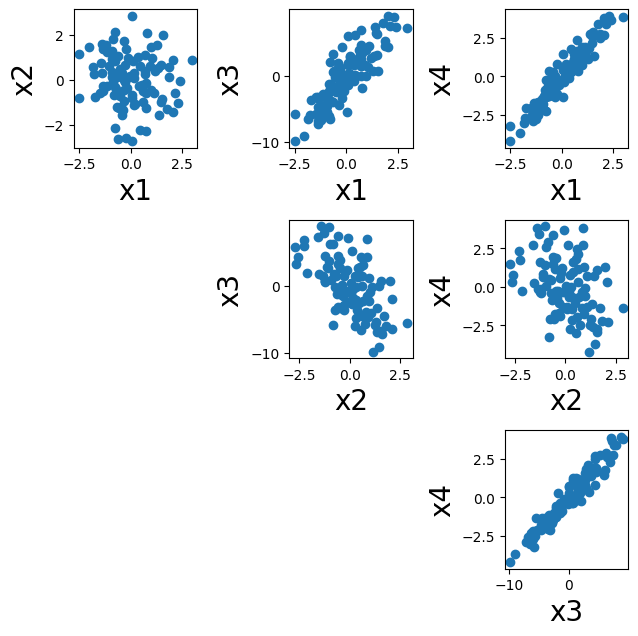

In [14]:
X = X - np.mean(X, axis=0)
plt.figure(figsize=(8,8))
for i in range(4):
  for j in range(4):
    if j > i:
      plt.subplot(4,4,i*4+j+1)
      plt.scatter(X[:,i], X[:,j])
      plt.xlabel(f'x{i+1}', fontsize=20)
      plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

In [17]:
pca = PCA(n_components=4)
pca.fit(X)
principal_comps_builtin = pca.components_.T
for i,component in enumerate(pca.components_):
  print(f'principal component {i}')
  print(component)
  print()

principal component 0
[-0.20594187  0.13700786 -0.89276365 -0.37654994]

principal component 1
[-0.48437282 -0.79183084  0.13622208 -0.34616532]

principal component 2
[ 0.20218915  0.3122614   0.36182156 -0.85480848]

principal component 3
[ 0.82588768 -0.50668094 -0.23130449 -0.08764809]



Hierarchial Clustering


In [20]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['flower_type'] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


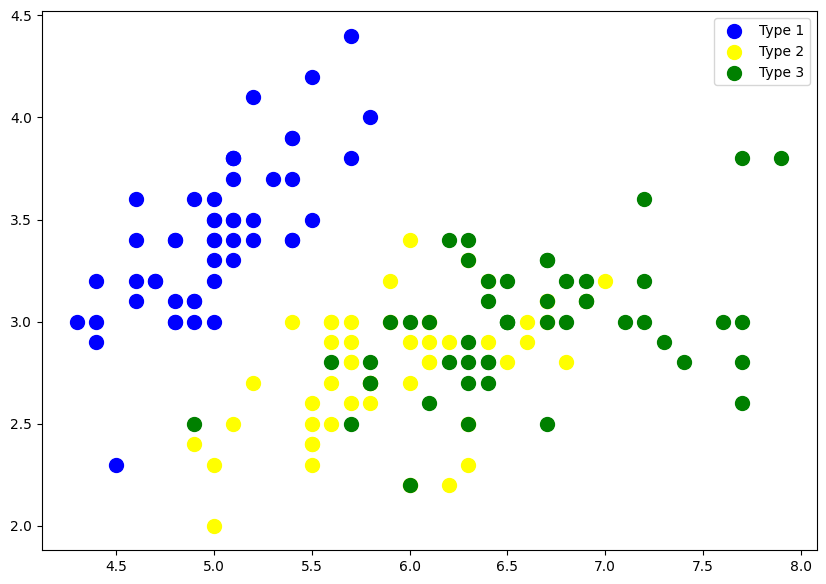

In [21]:
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
iris_Y = iris_data.iloc[:,4].values
plt.figure(figsize=(10, 7))
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s=100, c='blue', label='Type 1')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s=100, c='yellow', label='Type 2')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s=100, c='green', label='Type 3')
plt.legend()
plt.show()

Text(0, 0.5, 'Euclidean distance')

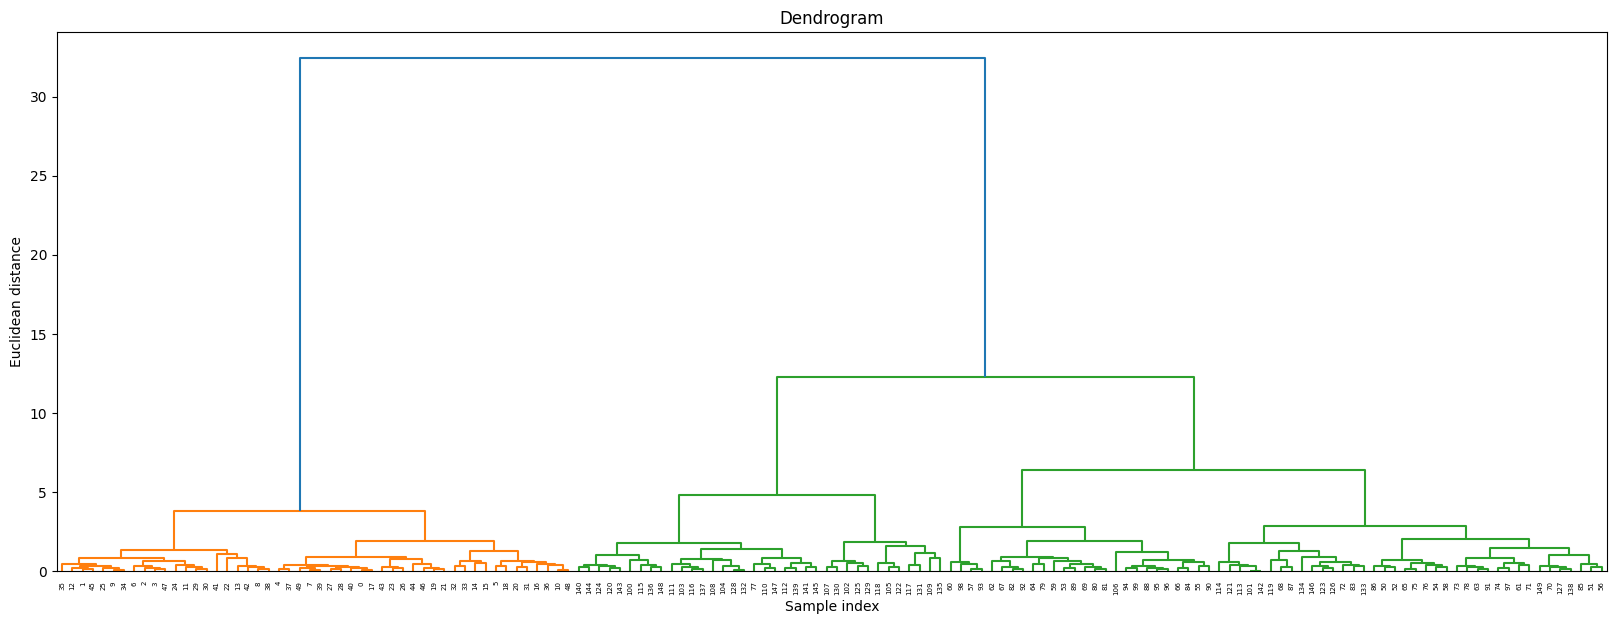

In [25]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
sc.dendrogram(sc.linkage(iris_X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [27]:
cluster = AgglomerativeClustering(
  n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit(iris_X)
labels = cluster.labels_
labels

C:\Users\Thoran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

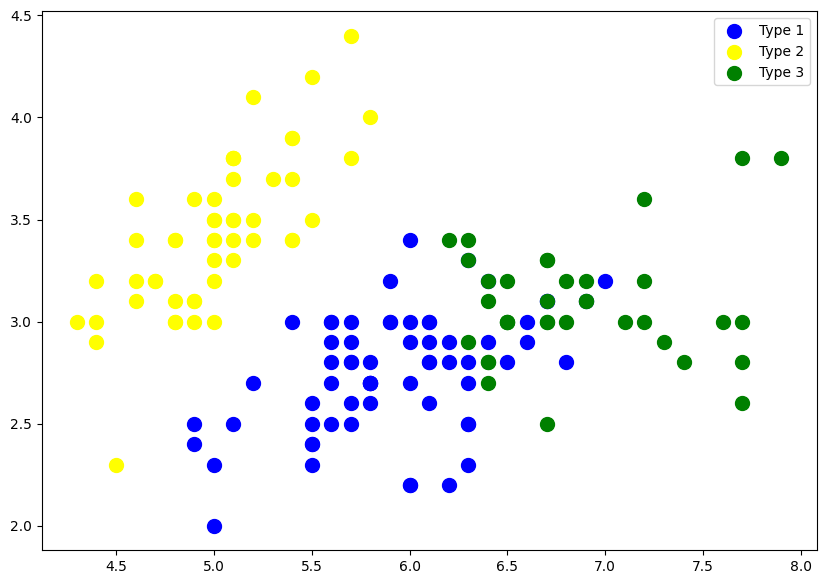

In [28]:
plt.figure(figsize=(10, 7))
plt.scatter(iris_X[labels == 0, 0], iris_X[labels == 0, 1], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(iris_X[labels == 1, 0], iris_X[labels == 1, 1], s = 100, c = 'yellow', label = 'Type 2')
plt.scatter(iris_X[labels == 2, 0], iris_X[labels == 2, 1], s = 100, c = 'green', label = 'Type 3')
plt.legend()
plt.show()

In [30]:
num_clusters = 0
mat = np.array([[0,2,6,10,9],[2,0,5,9,8],[6,5,0,4,5],[10,9,4,0,3],[9,8,5,3,0]])
all_elements = ['a','b','c','d','e']
dissimilarity_matrix = pd.DataFrame(mat,index=all_elements, columns=all_elements)

def avg_dissim_within_group_element(ele, element_list):
  max_diameter = -np.inf
  sum_dissm = 0
  for i in element_list:
    sum_dissm += dissimilarity_matrix[ele][i]   
    if( dissimilarity_matrix[ele][i]  > max_diameter):
      max_diameter = dissimilarity_matrix[ele][i]
  if(len(element_list)>1):
    avg = sum_dissm/(len(element_list)-1)
  else: 
    avg = 0
  return avg

def avg_dissim_across_group_element(ele, main_list, splinter_list):
  if len(splinter_list) == 0:
    return 0
  sum_dissm = 0
  for j in splinter_list:
    sum_dissm = sum_dissm + dissimilarity_matrix[ele][j]
  avg = sum_dissm/(len(splinter_list))
  return avg
    
    
def splinter(main_list, splinter_group):
  most_dissm_object_value = -np.inf
  most_dissm_object_index = None
  for ele in main_list:
    x = avg_dissim_within_group_element(ele, main_list)
    y = avg_dissim_across_group_element(ele, main_list, splinter_group)
    diff= x -y
    if diff > most_dissm_object_value:
      most_dissm_object_value = diff
      most_dissm_object_index = ele
  if(most_dissm_object_value>0):
    return  (most_dissm_object_index, 1)
  else:
    return (-1, -1)
    
def split(element_list):
  main_list = element_list
  splinter_group = []    
  (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
  while(flag > 0):
    main_list.remove(most_dissm_object_index)
    splinter_group.append(most_dissm_object_index)
    (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
  return (main_list, splinter_group)

def max_diameter(cluster_list):
  max_diameter_cluster_index = None
  max_diameter_cluster_value = -np.inf
  index = 0
  for element_list in cluster_list:
    for i in element_list:
      for j in element_list:
        if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
          max_diameter_cluster_value = dissimilarity_matrix[i][j]
          max_diameter_cluster_index = index
    index +=1 
  if(max_diameter_cluster_value <= 0):
    return -1 
  return max_diameter_cluster_index
    
current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
  print(level, current_clusters)
  (a_clstr, b_clstr) = split(current_clusters[index])
  del current_clusters[index]
  current_clusters.append(a_clstr)
  current_clusters.append(b_clstr)
  index = max_diameter(current_clusters)
  level +=1

print(level, current_clusters)

1 [['a', 'b', 'c', 'd', 'e']]
2 [['c', 'd', 'e'], ['a', 'b']]
3 [['a', 'b'], ['d', 'e'], ['c']]
4 [['a', 'b'], ['c'], ['e'], ['d']]
5 [['c'], ['e'], ['d'], ['b'], ['a']]


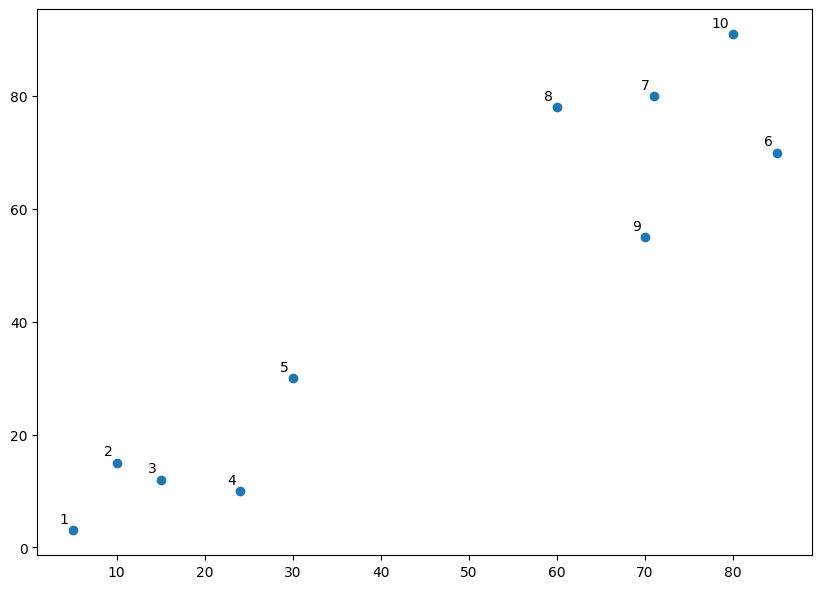

In [32]:
X = np.array([[5,3],
  [10,15],
  [15,12],
  [24,10],
  [30,30],
  [85,70],
  [71,80],
  [60,78],
  [70,55],
  [80,91],])

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
  plt.annotate(
    label,
    xy=(x, y), xytext=(-3, 3),
    textcoords='offset points', ha='right', va='bottom')
plt.show()

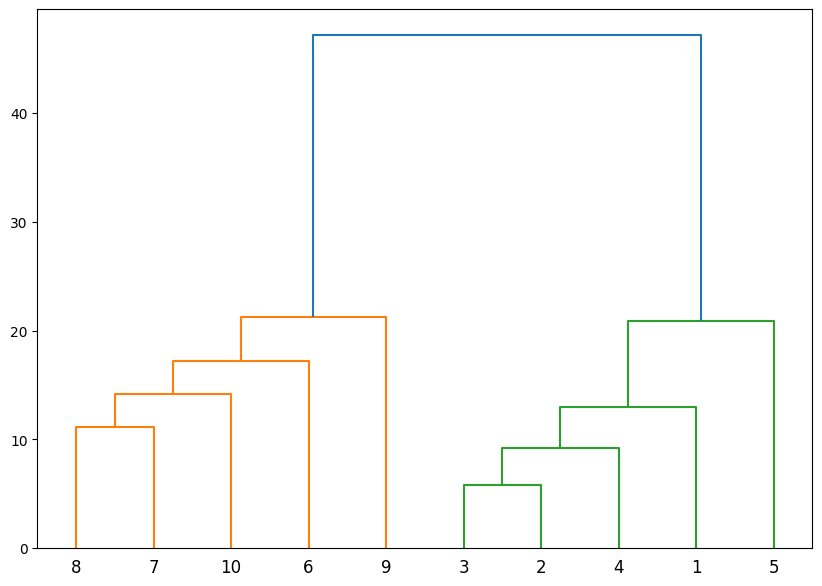

In [35]:
linked = linkage(X, 'single')
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
  orientation='top',
  labels=labelList,
  distance_sort='descending',
  show_leaf_counts=True)
plt.show()